In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/mnt/c/Users/phoen/Documents/GitHub/spateo-release')

import matplotlib.pyplot as plt
import numpy as np
import skimage
import sklearn
import spateo as st
import scanpy as sc
import dynamo as dyn 

plt.style.use('default')
plt.rcParams['image.interpolation'] = 'none'
%config InlineBackend.figure_format='retina'

/lab/solexa_weissman/xqiu/python37_nice/lib/python3.7/site-packages/geopandas-0.10.2-py3.7.egg/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string
2022-03-31 13:24:20.711550: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lab/solexa_weissman/xqiu/python37_nice/lib/python3.7/site-packages/cv2/../../lib64:/nfs/lsf8/8.0/linux2.6-glibc2.3-x86_64/lib
2022-03-31 13:24:20.711605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
network.py (36): The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geome

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


In [2]:
ffpe_unspliced_label = dyn.read_h5ad('/lab/solexa_weissman/xqiu/proj/Aristotle/spateo_project/spateo-notebooks-local/segmentation/data/ffpe/adata_unspliced_labels.h5ad')

In [4]:
ffpe_unspliced_label

AnnData object with n_obs × n_vars = 14183 × 25691
    obs: 'area'
    uns: '__type', 'spatial'
    obsm: 'bbox', 'contour', 'spatial', 'X_spatial'
    layers: 'spliced', 'unspliced'

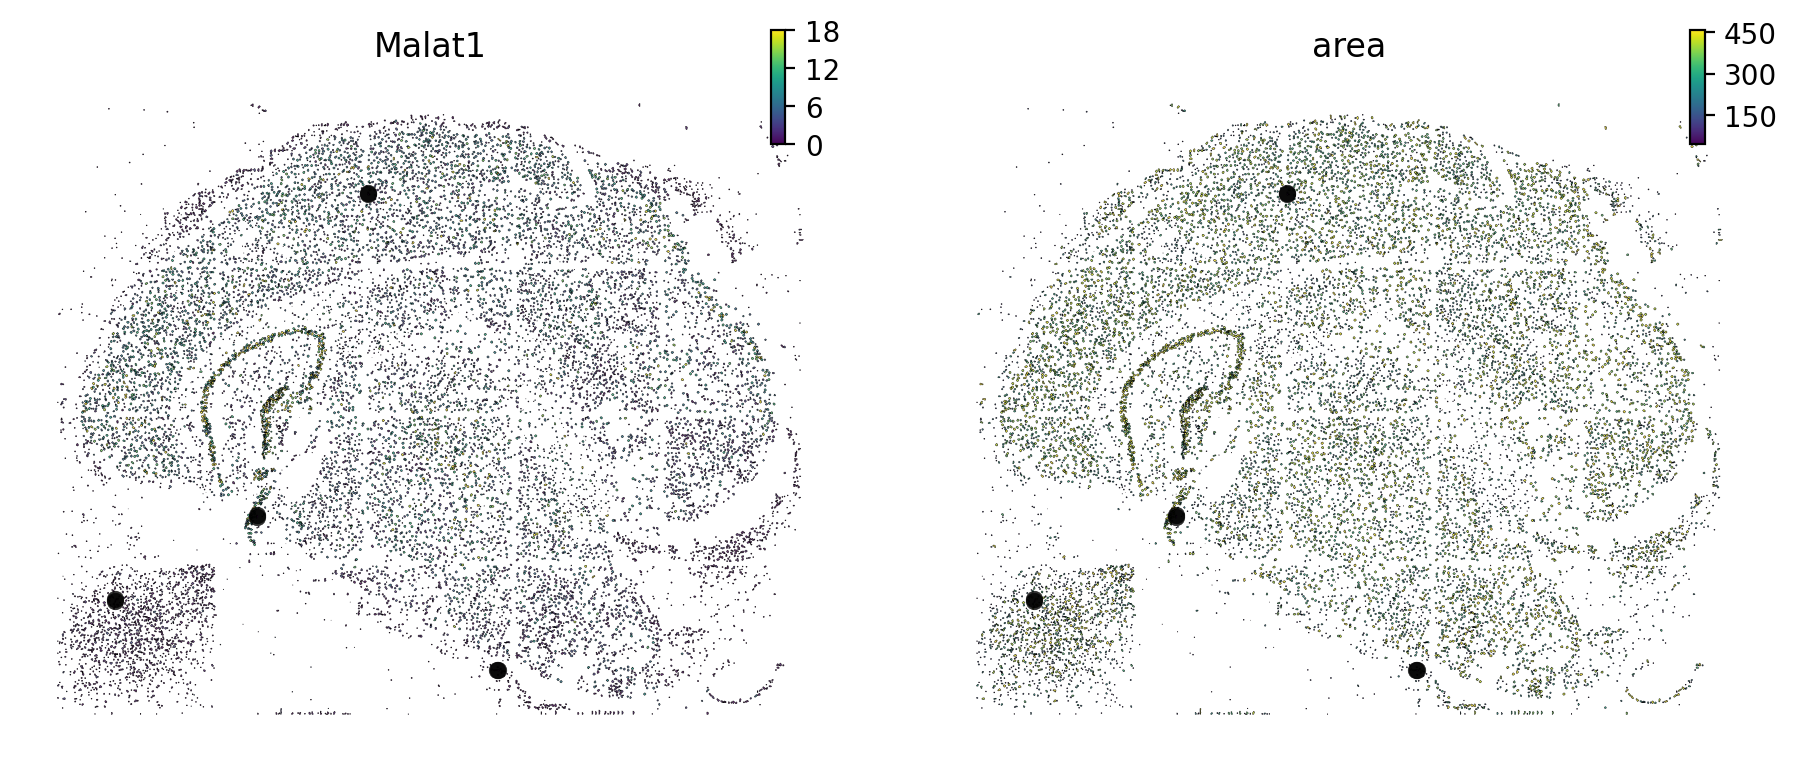

In [6]:
st.pl.geo(ffpe_unspliced_label, color=['Malat1', 'area'])

|-----> Binning counts with binsize=10.
|-----> Constructing count matrices.
|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


(<Figure size 400x400 with 1 Axes>, <AxesSubplot:>)

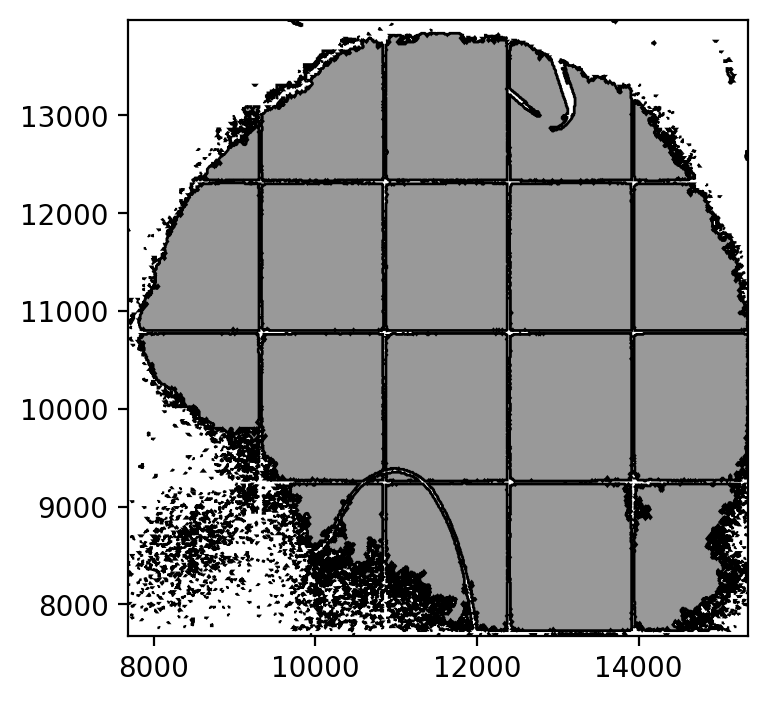

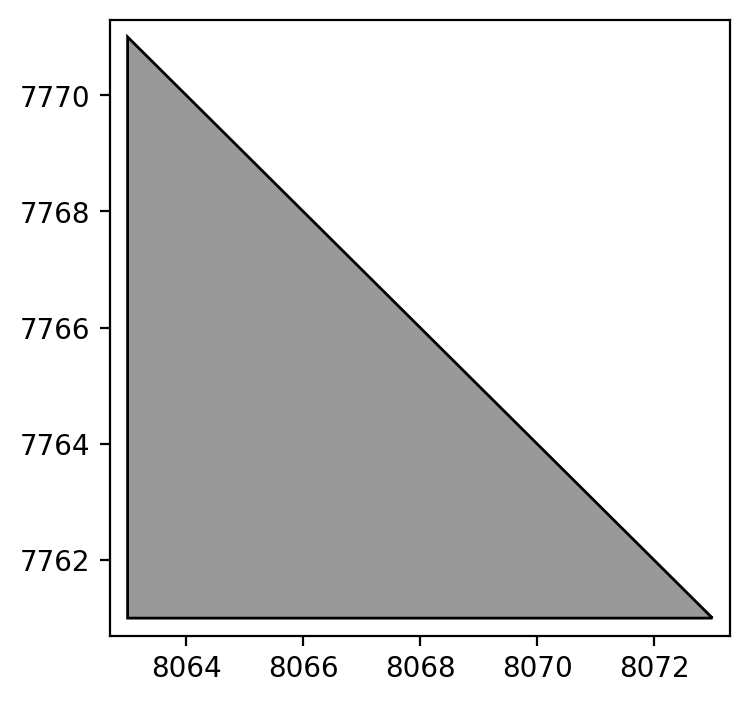

In [16]:
file = '/lab/solexa_weissman/xqiu/proj/Aristotle/spateo_project/data/FFPE/DP8400020256BR_F6.xrange_76684-84365_yrange_76766-83067.txt.gz'
alpha1 = st.io.get_concave_hull(file, binsize=10, alpha=0.1, min_agg_umi=10)
st.pl.polygon(alpha1[0], figsize=(4, 4))
st.pl.polygon(alpha1[0][0], figsize=(4, 4))

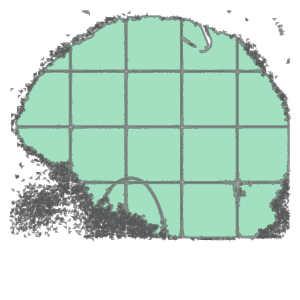

In [17]:
alpha1[0]

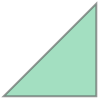

In [19]:
alpha1[0][1]

In [3]:
ffpe_unspliced_label = dyn.read_h5ad('/lab/solexa_weissman/xqiu/proj/Aristotle/spateo_project/spateo-notebooks-local/segmentation/data/ffpe/adata_unspliced_labels.h5ad')
ffpe_X_label = dyn.read_h5ad('/lab/solexa_weissman/xqiu/proj/Aristotle/spateo_project/spateo-notebooks-local/segmentation/data/ffpe/adata_X_labels.h5ad')

In [4]:
ffpe_unspliced_label, ffpe_X_label

(AnnData object with n_obs × n_vars = 14183 × 25691
     obs: 'area'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial'
     layers: 'spliced', 'unspliced',
 AnnData object with n_obs × n_vars = 14224 × 25691
     obs: 'area'
     uns: '__type', 'spatial'
     obsm: 'bbox', 'contour', 'spatial'
     layers: 'spliced', 'unspliced')

In [5]:
st.pp.filter.filter_genes(ffpe_unspliced_label, min_cells=10, inplace=True)
st.pp.filter.filter_cells(ffpe_unspliced_label, min_expr_genes=200, inplace=True)

ffpe_unspliced_label

AnnData object with n_obs × n_vars = 6066 × 13610
    obs: 'area', 'pass_basic_filter'
    var: 'pass_basic_filter'
    uns: '__type', 'spatial'
    obsm: 'bbox', 'contour', 'spatial'
    layers: 'spliced', 'unspliced'

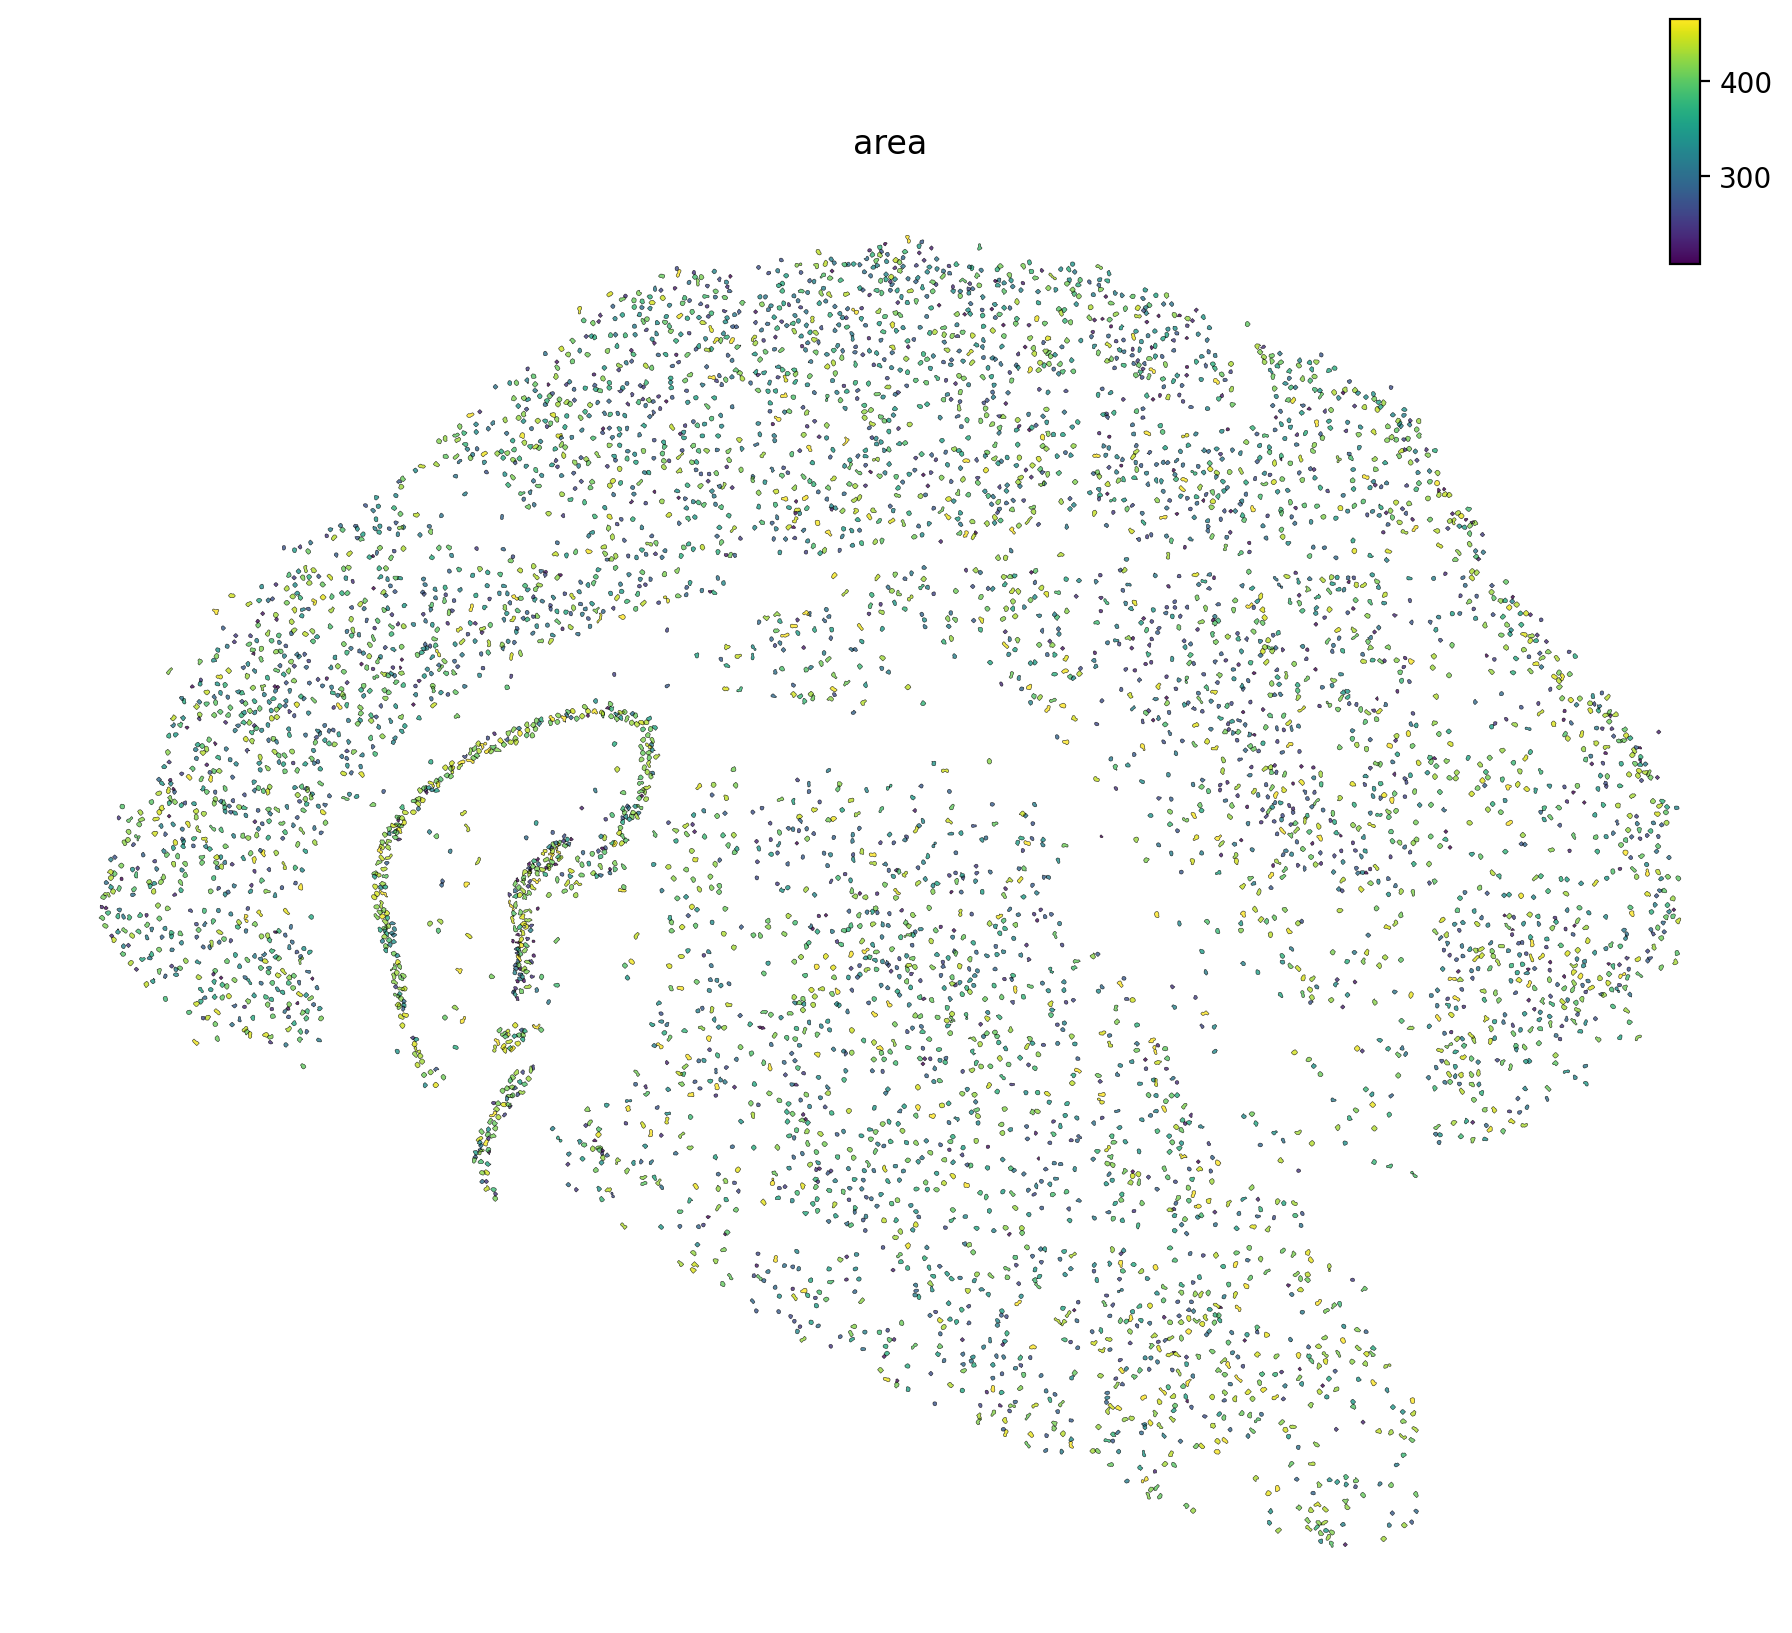

In [6]:
st.pl.geo(ffpe_unspliced_label, color='area', figsize=(12, 12))

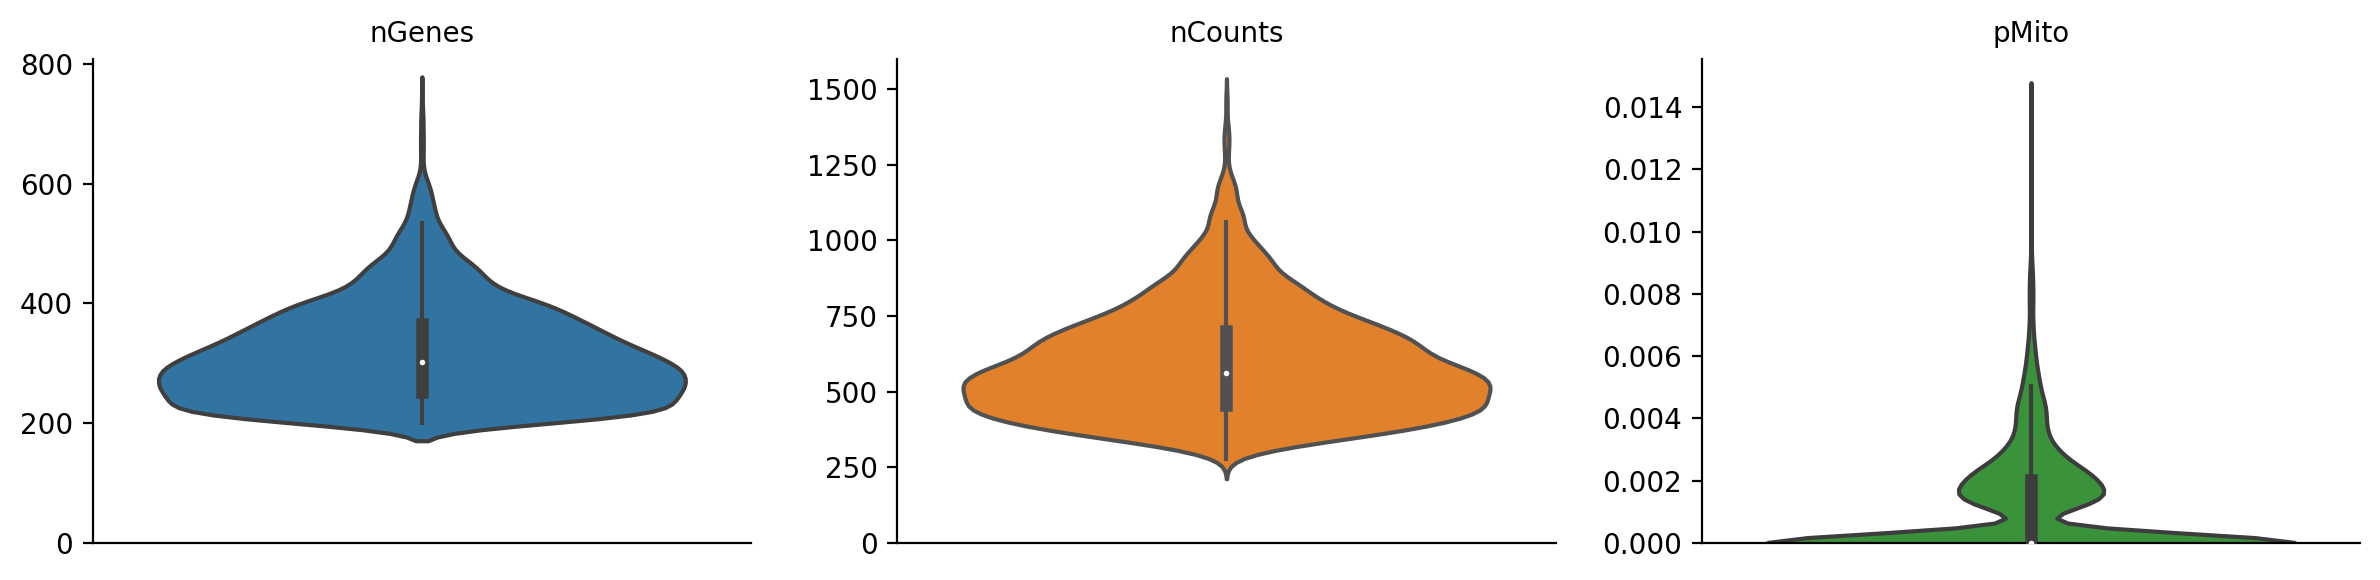

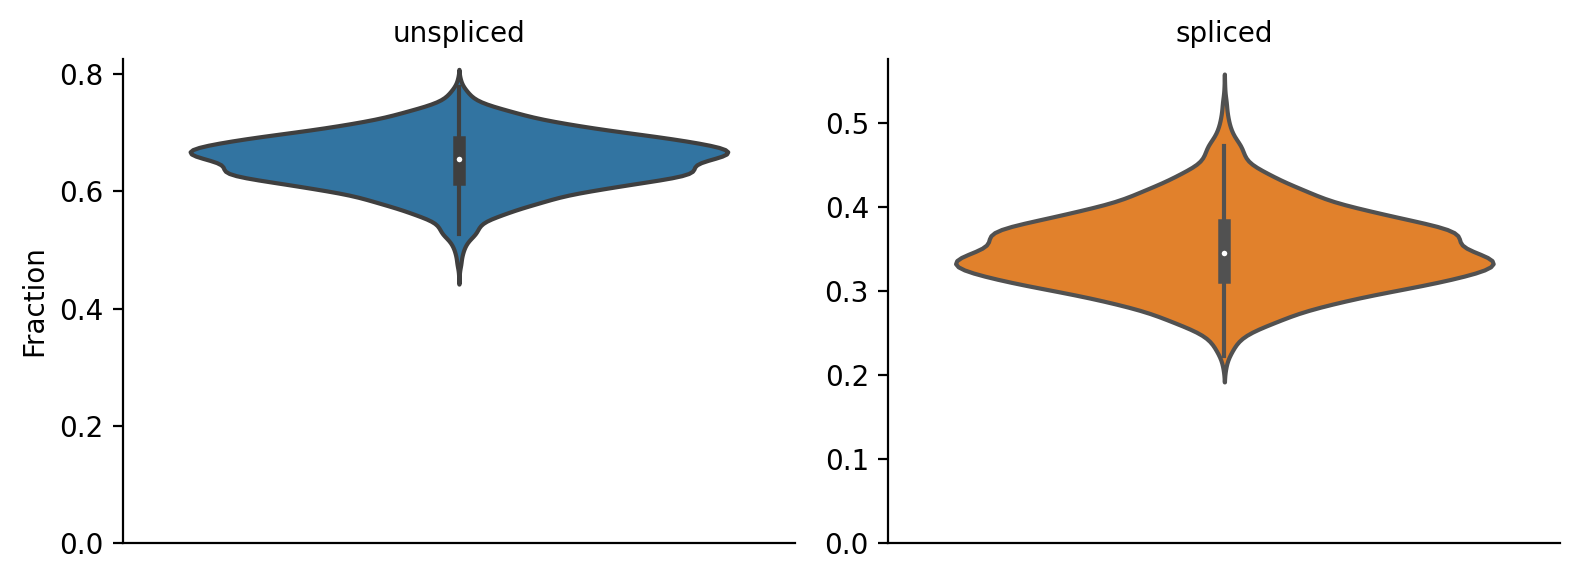

In [7]:
dyn.pl.basic_stats(ffpe_unspliced_label)

dyn.pl.show_fraction(ffpe_unspliced_label)

In [8]:
adata = dyn.pp.recipe_monocle(ffpe_unspliced_label)

dyn.tl.dynamics(ffpe_unspliced_label)

dyn.tl.reduceDimension(ffpe_unspliced_label)

dyn.tl.cell_velocities(ffpe_unspliced_label)

dyn.vf.VectorField(ffpe_unspliced_label, basis='umap')

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

estimating gamma: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1047/1047 [00:54<00:00, 19.35it/s]


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [38.1221s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|

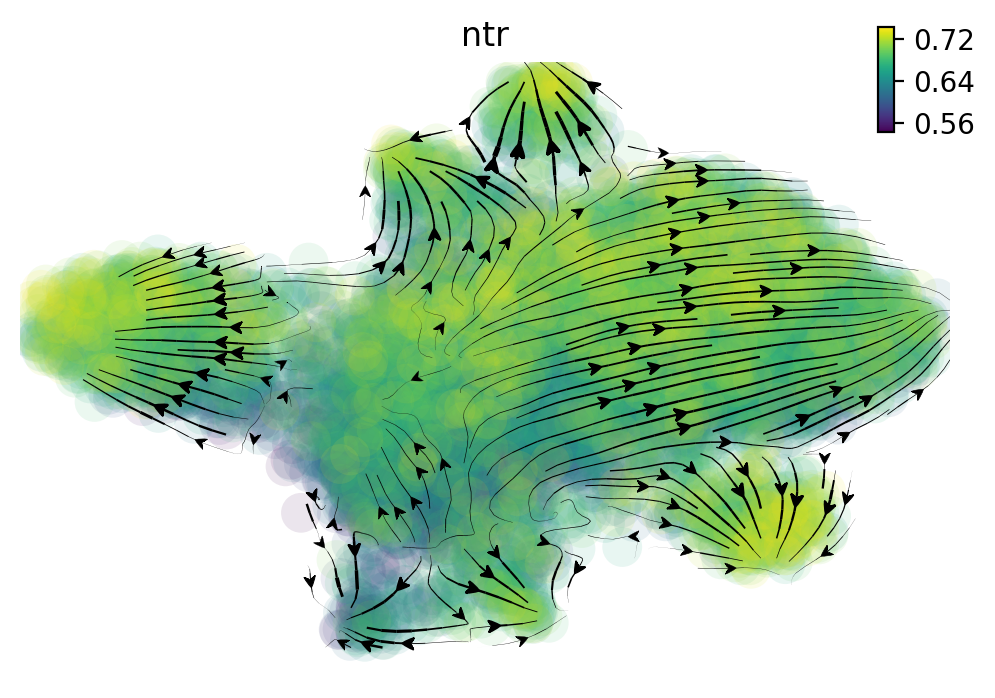

In [9]:
dyn.pl.streamline_plot(ffpe_unspliced_label)

In [34]:
to_dynode_ffpe = ffpe_unspliced_label[:, ffpe_unspliced_label.var.use_for_pca]

In [35]:
to_dynode_ffpe

View of AnnData object with n_obs × n_vars = 6029 × 1044
    obs: 'area', 'pass_basic_filter', 'nGenes', 'nCounts', 'pMito', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'pass_basic_filter', 'nCells', 'nCounts', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: '__type', 'spatial', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'VecFld_umap'
    obsm: 'bbox', 'contour', 'spatial', 'X_pca', 'X', 'X_umap', 'velocity_umap', 'velocity_umap_SparseVFC', 'X_umap_SparseVFC'
    

In [37]:
for i in ['M_u', 'M_uu', 'M_s', 'M_us', 'M_ss']:
    if i in to_dynode_ffpe.layers.keys(): 
        del to_dynode_ffpe.layers[i]

In [38]:
to_dynode_ffpe

AnnData object with n_obs × n_vars = 6029 × 1044
    obs: 'area', 'pass_basic_filter', 'nGenes', 'nCounts', 'pMito', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'pass_basic_filter', 'nCells', 'nCounts', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: '__type', 'spatial', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap', 'VecFld_umap'
    obsm: 'bbox', 'contour', 'spatial', 'X_pca', 'X', 'X_umap', 'velocity_umap', 'velocity_umap_SparseVFC', 'X_umap_SparseVFC'
    layers: 

In [39]:
?to_dynode_ffpe.write_h5ad

Signature:
to_dynode_ffpe.write_h5ad(
    filename: Union[os.PathLike, NoneType] = None,
    compression: Union[typing_extensions.Literal['gzip', 'lzf'], NoneType] = None,
    compression_opts: Union[int, Any] = None,
    force_dense: Union[bool, NoneType] = None,
    as_dense: Sequence[str] = (),
)
Docstring:
Write `.h5ad`-formatted hdf5 file.

.. note::
   Setting compression to `'gzip'` can save disk space
   but will slow down writing and subsequent reading.
   Prior to v0.6.16, this was the default for parameter `compression`.

Generally, if you have sparse data that are stored as a dense matrix,
you can dramatically improve performance and reduce disk space
by converting to a :class:`~scipy.sparse.csr_matrix`::

    from scipy.sparse import csr_matrix
    adata.X = csr_matrix(adata.X)

Parameters
----------
filename
    Filename of data file. Defaults to backing file.
compression
    See the h5py :ref:`dataset_compression`.
compression_opts
    See the h5py :ref:`dataset_compress

In [41]:
dyn.cleanup(to_dynode_ffpe)
to_dynode_ffpe.write_h5ad('to_dynode_ffpe', compression='gzip')